# COGS 118A - Project Checkpoint

# Chess Winner Prediction and Data Analysis

# Names

- Kalam Park
- Kira Fleischer 
- Cray Minor

# Abstract 
The goal of the reserach is to take advatnage of Lichess's online recorded matches to determine the factors that most strongly influences winning and to build a model that is able to predict the winner based on the factors found. The data used in this project represents various quantitative and qualitative measures of the competitors (~20,000 matches), in which we will use Logistic Regression as a baseline model using the significant factors, and create a filtered dataset for further analysis and model selection. We currently plan to use the SVM and Random Forests algorithms to select the model whilst cross-validating the model using metrics such as precision, recall, F1 score, and accuracy. This research aims to contribute to the understanding of complex competition, as well as assist in developing game strategies that closely links to success.

# Background

Chess is one of the world's most popular strategy games to date, and its ever-growing popularity has been heavily expedited due to the growing number of online platforms (Chess.com, Lichess) and users. With numerous events, streams, tutors, and creators online, chess can now be played and learned virtually anytime, anywhere. With the insurmountable amount of variations, openings, and data that comes with chess, the average player likely just scracthes the surface in understanding the deep complexity the game consists of. The emergence of AI and machine learning have offered a solution to this common dilemma, by providing a way to compute the mass amounts of available data and train the computer to do the thinking for them. That being said, AI and chess bots are amongst the most well known examples, popular for its near perfect chess performance, as well as a way of cheating.<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote) There has also been a lot of research on chess analysis and playing, such as Stockfish project, an opensource chess analysis algorithm which can provide players with an after game review with one of the most powerful chessbots.<a name="lorenz"></a>[<sup>[2]</sup>](#lorenznote) Evidently such knowledge can be highly beneficial in strategizing moves, openings, and sequences.

Similarly, our proposed work aims to provide helpful information by analyzing 20,000 Lichess matches and highlighting the variables that most heavily influences a user to win the match. Upon gathering these factors, we plan to restructure and split the dataset in order to train a model into predicting a winner based on some user inputs. This in hopes will help users strategize between openings, first moves, and help determine if white pieces really have an inherent advantage in novice to professional level matches. <a name="lorenz"></a>[<sup>[3]</sup>](#lorenznote)

# Problem Statement

Each side starting with 16 pieces, 6 different roles, and 64 squares there are nearly 10^120 different chess game variations, also known as Shannon's Number, which is more than there are atoms in the observable universe. <a name="lorenz"></a>[<sup>[4]</sup>](#lorenznote) We will be looking at the different features contained within our data to see the highest correlated with a win for white(1), a win for black(0), or a draw (2). Logistic Regression will serve as our baseline classifier because of its simplicity and replicability. We will compare its performance to more complex algorithms such as Random Forests and Support Vector Machinees quantified using confusion matricies and a ROC curve. After evaluation we select the model that performs best on the test and validation sets and its ability to generalize, to provide a comprehensive analysis of these games and potential winning strategies. 


# Proposed Solution

In order to predict the winner of the chess game, we will compare three different classification models and select the best one based on their respective performances, as measured by the evaluation metrics accuracy and f1 score. The three models we will use are:

1. Logistic Regression

Logistic regression is a method that aims to fit a linear decision boundary that separates classes based on their input features. Since there are three outcomes in our dataset, white win (1), black win (0), and draw (2), we will use use a one vs rest classifier in our logistic regression model to classify the three outcomes. In order to implement this model, we will split our dataset into training, validation, and test sets, where we will first train the model, tune the hyperparameters using the validation set, evaluate it based on accuracy and f1 score, and finally predict classifications using the test set. We will use gradient descent to find the best hyperparameters that minimize the loss function.

2. Random Forests

Random forests is a method that combines multiple decision trees that are each trained on a random subset of the training data and a random subset of the input features. We are using random forests because this method has many advantages over simple decision trees. For instance, random forests reduce overfitting by averaging the predictions of many decision trees. More importantly, however, random forests provide a measure of the importance of each feature by evaluating how much the performance of the model changes when different features are removed. This will help us determine which feature (player ratings, opening moves, piece color, etc.) are most important in predicting a winner. We will follow a similar method as with Logistic Regression to evaluate our Random Forests model. That is, we will split the data into training and test sets, train the model on the training set, tune the hyperparameters on the training set using k-fold cross-validation, evaluate the model based on accuaracy and f1 score, and finally predict classifications using the test set.

3. SVM

SVM is a method that aims to find a hyperplane that separates classes while creating the largest margin between the classes, which is determined by support vectors within the classes. This is achieved by minimizing a loss function that accounts for both misclassification errors and points that are within the margin surrounding the decision boundary hyperplane. We will most likely use linear SVM since this handles large datasets well, and we do not anticipate any curvature to or nonlinear patters in the data. As with the Logistic Regression and Random Forests models, we will begin by splitting our data set into training and test sets. Then we will train the model on the traning set using a one vs one classifier. Next we will tune the hyperparameters on the training set using k-fold cross-validation and evaluate the model based on accuracy and f1 score, and finally we will predict classifications using the test set.

# Data


### Chess Game Dataset - Lichess (https://www.kaggle.com/datasets/datasnaek/chess)
- A collection of ~20,000 recorded chess matches between two Lichess users 
- Contains 16 variables 
    - Game ID; 
    - Rated (T/F);
    - Start Time;
    - End Time;
    - Number of Turns;
    - Game Status;
    - Winner;
    - Time Increment;
    - White Player ID;
    - White Player Rating;
    - Black Player ID;
    - Black Player Rating;
    - All Moves in Standard Chess Notation;
    - Opening Eco (Standardised Code for any given opening, list here);
    - Opening Name;
    - Opening Ply (Number of moves in the opening phase)


- Evidently some varibales will be more impactful than others, some critical ones are as listed:
    - White/Black rating (ranking)
    - Opening move 
    - Piece colors

A lot of the categorzing is done for us since each opening move has a respective eco code. There are some varibales such as Game status and Winner that can be categorized numerically. We also plan to just completely remove some variables we believe should have no impact or influence on predicting who would win a game (ex: Game status, All Moves in Standard Chess Notation, Game ID, player IDs, etc.)


In [1]:
#import statements
import pandas as pd 


In [2]:
#import data from csv, set the row index to be the game ids
df = pd.read_csv('data/games.csv').set_index('id')
df.head(1)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
id,,,,,,,,,,,,,,,
TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


In [3]:
#convert unix time so it's readable 
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')
df.head(10)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
id,,,,,,,,,,,,,,,
TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
kWKvrqYL,True,2017-08-30 16:20:00,2017-08-30 16:20:00,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
9tXo1AUZ,True,2017-08-29 18:06:40,2017-08-29 18:06:40,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
MsoDV9wj,False,2017-09-01 04:26:40,2017-09-01 04:26:40,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
qwU9rasv,True,2017-09-01 01:40:00,2017-09-01 01:40:00,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
RVN0N3VK,False,2017-08-25 16:53:20,2017-08-25 16:53:20,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
dwF3DJHO,True,2017-08-23 17:40:00,2017-08-23 17:40:00,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6


In [4]:
#datatypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20058 entries, TZJHLljE to N8G2JHGG
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rated           20058 non-null  bool          
 1   created_at      20058 non-null  datetime64[ns]
 2   last_move_at    20058 non-null  datetime64[ns]
 3   turns           20058 non-null  int64         
 4   victory_status  20058 non-null  object        
 5   winner          20058 non-null  object        
 6   increment_code  20058 non-null  object        
 7   white_id        20058 non-null  object        
 8   white_rating    20058 non-null  int64         
 9   black_id        20058 non-null  object        
 10  black_rating    20058 non-null  int64         
 11  moves           20058 non-null  object        
 12  opening_eco     20058 non-null  object        
 13  opening_name    20058 non-null  object        
 14  opening_ply     20058 non-null  int64         
dt

### Data Cleaning

In [5]:
#first let's remove the user ids of the players, to preserve privacy and because it's not necessary in this specific research problem
df = df.drop(['white_id', 'black_id'], axis=1)

In [6]:
#the moves list and opening name should also be removed. Using an entire moves list as one of the factors is inefficient and there is already an opening eco column so both moves and opening_name are not needed
df = df.drop(['moves', 'opening_name'], axis=1)
df.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
id,,,,,,,,,,,
TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,1500,1191,D10,5
l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,1322,1261,B00,4
mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,1496,1500,C20,3
kWKvrqYL,True,2017-08-30 16:20:00,2017-08-30 16:20:00,61,mate,white,20+0,1439,1454,D02,3
9tXo1AUZ,True,2017-08-29 18:06:40,2017-08-29 18:06:40,95,mate,white,30+3,1523,1469,C41,5


In [7]:
#Check for missing values, NaNs, and nulls 
df.isna().any()

rated             False
created_at        False
last_move_at      False
turns             False
victory_status    False
winner            False
increment_code    False
white_rating      False
black_rating      False
opening_eco       False
opening_ply       False
dtype: bool

In [8]:
#No missing/null values, so let's see if there are any duplicate games 
print(f"\nNumber of rows before = {str(df.shape[0])[:2]},{str(df.shape[0])[2:]}")
print('Number of duplicated rows in data: ',df.duplicated().sum())

#delete duplicated games
df = df.drop_duplicates()
print(f"\nNumber of rows after duplicate drop = {str(df.shape[0])[:2]},{str(df.shape[0])[2:]}")
print('Number of duplicated rows in data: ',df.duplicated().sum())


Number of rows before = 20,058
Number of duplicated rows in data:  429

Number of rows after duplicate drop = 19,629
Number of duplicated rows in data:  0


In [9]:
#If you take a look at the the created_at and last_move_at times, they are exactly the same... so delete them as well
df = df.drop(['created_at', 'last_move_at'], axis=1)
df.head(2)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
id,,,,,,,,,
TZJHLljE,False,13,outoftime,white,15+2,1500,1191,D10,5
l1NXvwaE,True,16,resign,black,5+10,1322,1261,B00,4


In [10]:
#Let's perform binary encoding on the 'rated', 'winner', and 'victory status'

df['rated'] = df['rated'].astype(int)
df['winner'] = df['winner'].replace({'white': 0, 'black': 1, 'draw': 2}).astype(int)
df['victory_status'] = df['victory_status'].replace({'mate': 0, 'resign': 1, 'draw': 2, 'outoftime': 3}).astype(int)

### Final clean data

In [11]:
df.head(10)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
id,,,,,,,,,
TZJHLljE,0,13,3,0,15+2,1500,1191,D10,5
l1NXvwaE,1,16,1,1,5+10,1322,1261,B00,4
mIICvQHh,1,61,0,0,5+10,1496,1500,C20,3
kWKvrqYL,1,61,0,0,20+0,1439,1454,D02,3
9tXo1AUZ,1,95,0,0,30+3,1523,1469,C41,5
MsoDV9wj,0,5,2,2,10+0,1250,1002,B27,4
qwU9rasv,1,33,1,0,10+0,1520,1423,D00,10
RVN0N3VK,0,9,1,1,15+30,1413,2108,B00,5
dwF3DJHO,1,66,1,1,15+0,1439,1392,C50,6


White win = 0

Black win = 1

Draw = 2

In [12]:
df['opening_eco'].nunique()

365

In [13]:
df = df.drop(columns =['increment_code', 'opening_eco'])

In [14]:
df.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_ply
id,,,,,,,
TZJHLljE,0,13,3,0,1500,1191,5
l1NXvwaE,1,16,1,1,1322,1261,4
mIICvQHh,1,61,0,0,1496,1500,3
kWKvrqYL,1,61,0,0,1439,1454,3
9tXo1AUZ,1,95,0,0,1523,1469,5


# Evaluation Metrics

We will evaluate our model performances using the metrics accuracy and f1 score. 

Accuracy will be calculated by dividing the the number of correct predictions (e.g. white predicted to win and white actually wins) by the number of total predictions (the total training set size):

    accuracy = (number of correct predictions) / (number of total predictions)

This will give a pretty good estimate of which model is best at accurately predicting who will win since this is the most direct computation. 

Additionally, we will calculate the f1 score to compare our models. Since there are 3 outcomes in our classification problem, we must use a weighted average f1 score. That means precision, recall, and f1 score will be calculated 3 times each. Each class (white win, black win, and draw) will serve as the positive class for one round of calculations, with the remaining two classes serving as the negative class. For example, for one calculation of precision, recall and f1 score, white win will be the positive class, and black win or draw will be the negative class. Precision, recall, and f1 score will be calculated by the following formulae:

    TP = number of instances correctly classified as positive class (e.g. white win predicted as white win)
    FP = number of instances incorrectly classified as positive class (e.g. black win or draw predicted as white win)
    FN = number of instances incorrectly classified as negative class (e.g. white win predicted as black win or draw)
    TN = number of instances correctly classified as negative class (e.g. black win or draw predicted as black win or draw)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 score = (2 * precision * recall) / (precision + recall)

To calculate the weighted average f1 score, we will use the following formulae:

    N_white_win = number of instances in dataset of white win
    N_black_win = number of instances in dataset of black win
    N_draw = number of instances in dataset of draw
    N_total = number of total instances in dataset
    f1 weighted average = ((F1 score white win * N_white_win) + (F1 score black win * N_black_win) + (F1 score draw * N_draw)) / N_total

We wanted to use the weighted average f1 score to account for the imbalanced class sizes we have, since there are significantly fewer instances of draws than of white wins or black wins. The weighted average f1 score gives more weight to classes that have more instances, so this works well in our situation.

# Preliminary results



In [15]:
#imports for baseline classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
X = df.drop('winner', axis = 1)
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/kirafleischer/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6169128884360673


In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(y_test,y_pred, average = 'weighted')
precision = precision_score(y_test,y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("F1 Score:", f1, "Precision:", precision, "Recall Score:", recall)

F1 Score: 0.60407797190092 Precision: 0.6208760855559973 Recall Score: 0.6169128884360673


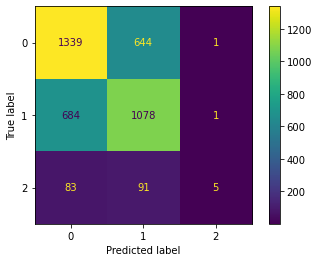

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [21]:
import sklearn

/Users/kirafleischer/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kirafleischer/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

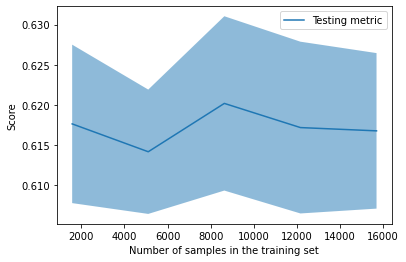

In [22]:
# validation curve
#from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(log_reg, X, y)
display = sklearn.model_selection.LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

# Ethics & Privacy

This project is from an online chess website Lichess, the data is freely available for collection and analysis. In order to address the any ethical concern of privacy, we will delete the Game ID and player ID variables so that there is no way to trace exact players or games, these variables are not important to our data analysis or model selection and will not otherwise affect our project nor the players from which the data is collected. Player ranking might also raise some ethical consideration, but because we are not keeping any identifying information about the player or game their privacy including ranking, will remain protected in our project. The results of this project does not raise any ethical or privacy concerns, but instead might offer players valuable insight to winning games.

# Team Expectations 

* Meet weekly to discuss what we have each accomplished and what we still need to work on
* Notify other group members of what we are currently working on and when we have completed it
* Communicate through text and Discord
* Respond to communications within 24 hours, not including weekends
* Ask for help when needed and work together to help address any confusions

# Project Timeline Proposal



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; find dataset | 
| 2/21  |  9 AM |  Do background research on topic (Cray); finalize dataset (Kalam)| Draft project proposal | 
| 2/22  | 5 PM  | Edit, finalize, and submit proposal  |  Assign group members to lead each specific part   |
| 3/1  | 5 PM  | Import & Wrangle Data, do some EDA (Kalam) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/8  | 5 PM  | Finalize wrangling/EDA (Kalam); Implement baseline model (Cray); Edit proposal (Kira) | Discuss/edit project code; Finalize Analysis Plan |
| 3/15  | 5 PM  | Implement other models and complete analysis (Kalam, Kira); Draft results/conclusion/discussion (Cray)| Discuss/edit full project |
| 3/22  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): The Impact of Artificial Intelligence on the Chess World, Duca Iliescu (2020) https://games.jmir.org/2020/4/e24049/

<a name="lorenznote"></a>2.[^](#lorenz): AlphaZero, Zhang & Yu (2020) https://link.springer.com/chapter/10.1007/978-981-15-4095-0_15

<a name="lorenznote"></a>3.[^](#lorenz): First Move Advantage in Chess https://en.wikipedia.org/wiki/First-move_advantage_in_chess

<a name="lorenznote"></a>4.[^](#lorenz): Which is greater? The number of atoms in the universe or the number of chess moves?, Kiernan https://www.liverpoolmuseums.org.
